# 케라스 다양한 학습 기술

- 과대적합, 과소적합을 막기 위한 방법들
  - 모델의 크기 축소
  
  - 초기화

  - 옵티마이저

  - 배치 정규화

  - 규제화

### 모델의 크기 축소
- 가장 단순한 방법

- 모델의 크기를 줄인다는 것은 **학습 파라미터의 수를 줄이는 것**

#### 데이터 준비
- 설명을 위한 코드

In [1]:
from tensorflow.keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=5000)

def vectorize_seq(seqs, dim=5000):
  results = np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq] = 1.

  return results

x_train = vectorize_seq(train_data)
x_test = vectorize_seq(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

#### 2가지의 모델 설정

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
model_1 = Sequential([Dense(16, activation='relu', input_shape=(5000,), name='input'),
                      Dense(16, activation='relu', name='hidden'),
                      Dense(1, activation='sigmoid', name='output')])

In [4]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 16)                80016     
                                                                 
 hidden (Dense)              (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
model_2 = Sequential([Dense(7, activation='relu', input_shape=(5000,), name='input2'),
                      Dense(7, activation='relu', name='hidden2'),
                      Dense(1, activation='sigmoid', name='output2')])

In [6]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input2 (Dense)              (None, 7)                 35007     
                                                                 
 hidden2 (Dense)             (None, 7)                 56        
                                                                 
 output2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 35,071
Trainable params: 35,071
Non-trainable params: 0
_________________________________________________________________


In [7]:
model_1.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

model_2.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

#### 2개의 모델 학습

In [8]:
model_1_hist = model_1.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 39ms/step - loss: 0.4622 - acc: 0.8141 - val_loss: 0.3539 - val_acc: 0.8610
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2835 - acc: 0.8963 - val_loss: 0.2892 - val_acc: 0.8862
Epoch 3/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2333 - acc: 0.9119 - val_loss: 0.2924 - val_acc: 0.8819
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2069 - acc: 0.9215 - val_loss: 0.2892 - val_acc: 0.8840
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1903 - acc: 0.9280 - val_loss: 0.3106 - val_acc: 0.8768
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1745 - acc: 0.9354 - val_loss: 0.3403 - val_acc: 0.8700
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.1641 - acc: 0.9386 - val_loss: 0.3259 - val_acc: 0.8771
Epoch 8/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1553 - a

In [9]:
model_2_hist = model_2.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.5714 - acc: 0.7836 - val_loss: 0.4780 - val_acc: 0.8550
Epoch 2/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3988 - acc: 0.8797 - val_loss: 0.3701 - val_acc: 0.8758
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3080 - acc: 0.8993 - val_loss: 0.3174 - val_acc: 0.8828
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2590 - acc: 0.9100 - val_loss: 0.2902 - val_acc: 0.8868
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2292 - acc: 0.9171 - val_loss: 0.2816 - val_acc: 0.8861
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2109 - acc: 0.9225 - val_loss: 0.2809 - val_acc: 0.8863
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.1976 - acc: 0.9281 - val_loss: 0.2869 - val_acc: 0.8845
Epoch 8/20
49/49 [==============================] - 1s 15ms/step - loss: 0.1876 - a

#### 비교

In [10]:
epochs = range(1, 21)
model_1_val_loss = model_1_hist.history['val_loss']
model_2_val_loss = model_2_hist.history['val_loss']

In [11]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

model_2 (더 작은 모델)이 '조금 더 나중에' 과대적합 발생

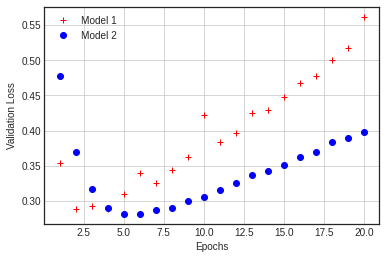

In [12]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 모델의 크기 축소 (2)


#### 모델 구성

In [13]:
model_3 = Sequential([Dense(1024, activation='relu', input_shape=(5000,), name='input3'),
                      Dense(1024, activation='relu', name='hidden3'),
                      Dense(1, activation='sigmoid', name='output3')])

model_3.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['acc'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input3 (Dense)              (None, 1024)              5121024   
                                                                 
 hidden3 (Dense)             (None, 1024)              1049600   
                                                                 
 output3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 6,171,649
Trainable params: 6,171,649
Non-trainable params: 0
_________________________________________________________________


#### 모델 학습
- 시간 소요

In [14]:
model_3_hist = model_3.fit(x_train, y_train,
                           epochs=20,
                           batch_size=512,
                           validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 47ms/step - loss: 0.5173 - acc: 0.8000 - val_loss: 0.2791 - val_acc: 0.8837
Epoch 2/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2414 - acc: 0.9025 - val_loss: 0.3381 - val_acc: 0.8593
Epoch 3/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1491 - acc: 0.9441 - val_loss: 0.2933 - val_acc: 0.8784
Epoch 4/20
49/49 [==============================] - 1s 26ms/step - loss: 0.0646 - acc: 0.9793 - val_loss: 0.6605 - val_acc: 0.7854
Epoch 5/20
49/49 [==============================] - 1s 26ms/step - loss: 0.1057 - acc: 0.9843 - val_loss: 0.3698 - val_acc: 0.8819
Epoch 6/20
49/49 [==============================] - 1s 25ms/step - loss: 0.0019 - acc: 0.9999 - val_loss: 0.5796 - val_acc: 0.8834
Epoch 7/20
49/49 [==============================] - 1s 25ms/step - loss: 0.1316 - acc: 0.9860 - val_loss: 0.7098 - val_acc: 0.8615
Epoch 8/20
49/49 [==============================] - 1s 26ms/step - loss: 4.4779e-04

#### 시각화

In [15]:
model_3_val_loss = model_3_hist.history['val_loss']

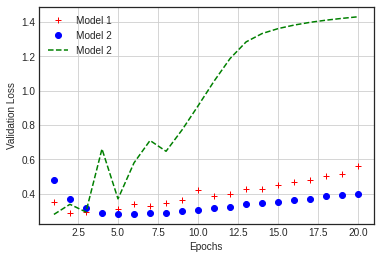

In [16]:
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_val_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_val_loss, 'g--', label='Model 2')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

* 볼륨이 큰 신경망일수록 빠르게 훈련데이터 모델링 가능(학습 손실이 낮아짐)
* 과대 적합에는 더욱 민감해짐
* 이는 학습-검증 데이터의 손실을 보면 알 수 있음

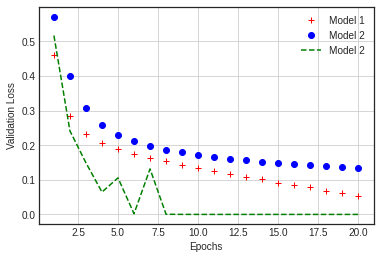

In [17]:
model_1_train_loss = model_1_hist.history['loss']
model_2_train_loss = model_2_hist.history['loss']
model_3_train_loss = model_3_hist.history['loss']

plt.plot(epochs, model_1_train_loss, 'r+', label='Model 1')
plt.plot(epochs, model_2_train_loss, 'bo', label='Model 2')
plt.plot(epochs, model_3_train_loss, 'g--', label='Model 2')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 가중치 초기화


#### 초기화 전략

- Glorot Initialization (Xavier)
  - 활성화 함수  
    - 없음
    - tanh
    - sigmoid
    - softmax

- He Initialization 
  - 활성화 함수  
    - ReLU
    - LeakyReLU
    - ELU 등

    

In [18]:
from tensorflow.keras.layers import Dense, LeakyReLU, Activation
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential([Dense(30, kernel_initializer='he_normal', input_shape=[10,10]),
                    LeakyReLU(alpha=0.2),
                    Dense(1, kernel_initializer='he_normal'),
                    Activation("softmax")])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10, 30)            330       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 30)            0         
                                                                 
 dense_1 (Dense)             (None, 10, 1)             31        
                                                                 
 activation (Activation)     (None, 10, 1)             0         
                                                                 
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


### 고속 옵티마이저

#### 모멘텀 최적화

$
\qquad v \ \leftarrow \ \alpha \ v - \gamma \ \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \ v
$

  - $\alpha\ $ : 관성계수 

  - $v$ :  속도

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : 손실함수에 대한 미분

In [20]:
import tensorflow as tf
from tensorflow.keras.optimizers import SGD

In [21]:
optimizer = SGD(learning_rate=0.001, momentum=0.9)

#### 네스테로프 (Nesterov)

- 모멘텀의 방향으로 조금 앞선 곳에서 손실함수의 그라디언트를 구함

- 시간이 지날수록 조금 더 빨리 최솟값에 도달

$
\qquad m \ \leftarrow \  \beta m - \eta \bigtriangledown_\theta J(\theta + \beta m) \\
\qquad \theta \ \leftarrow \ \theta \ + m
$


  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\eta\ $ : 학습률

  - $\bigtriangledown_\theta J(\theta) \ $ : $\theta$에 대한 미분(그라디언트)

  <img src="https://t1.daumcdn.net/cfile/tistory/99D91C455C76428D11">

  <sub>출처: CS231n</sub>

In [22]:
optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

#### AdaGrad

- 보통 간단한 모델에는 효과 좋을 수는 있으나, 심층 신경망 모델에서는 사용 X

$
\qquad h \ \leftarrow \  h + \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad W \ \leftarrow \ W \ + \gamma \frac{1}{\sqrt h} \ \frac{\partial L}{\partial W}
$

  - $h\ $ : 기존 기울기를 제곱하여 더한 값

  - $\gamma\ $ : 학습률

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분


In [23]:
from tensorflow.keras.optimizers import Adagrad

In [24]:
optimizer = Adagrad(learning_rate=0.001)

#### RMSProp


$
\qquad s \ \leftarrow \ \beta \ s + (1 - \beta) \bigtriangledown_{\theta} J(\theta) \otimes \bigtriangledown_{\theta} J(\theta) \\
\qquad \theta \ \leftarrow \ \theta \ - \eta  \ \bigtriangledown_{\theta} J(\theta) \oslash \sqrt{s + \epsilon}
$

  - $s \ $ : 그래디언트의 제곱을 감쇠율을 곱한 후 더함

  - $\eta\ $ : 학습률

  - $\bigtriangledown_{\theta} J(\theta) \ $ : 손실함수의 미분값


  

In [25]:
from tensorflow.keras.optimizers import RMSprop

In [26]:
optimizer = RMSprop(learning_rate=0.001, rho=0.9)

#### Adam

$
\qquad m \ \leftarrow \  \beta_1 \ m - (1 - \beta_1)\ \frac{\partial L}{\partial W}  \\
\qquad s \ \leftarrow \ \beta_2 \ s + (1 - \beta_2) \frac{\partial L}{\partial W} \odot \frac{\partial L}{\partial W} \\
\qquad \hat{m} \ \leftarrow \frac{m}{1 - \beta_1^t} \\
\qquad \hat{s} \ \leftarrow \frac{s}{1 - \beta_2^t} \\
\qquad W \ \leftarrow \ W \ + \gamma \ \hat{m}\  \oslash \sqrt{\hat{s} + \epsilon}
$

  - $\beta\ $ : 지수 평균의 업데이트 계수

  - $\gamma\ $ : 학습률

  - $\beta_1 \approx 0.9\ ,\ \ \beta_2 \approx 0.999$

  - $\frac{\partial L}{\partial W}\ $ : $W$에 대한 미분

In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 배치 정규화
- 모델에 주입되는 샘플들을 균일하게 만드는 방법

- 학습 후 새로운 데이터에 잘 일반화 할 수 있도록 도와줌

- 데이터 전처리 단계에서 진행해도 되지만 정규화가 되어서 layer에 들어갔다는 보장이 없음

- 주로 **Dense** 또는 **Conv2D** Layer 후, **활성화 함수**이전에 놓임


In [29]:
from tensorflow.keras.layers import BatchNormalization, Dense, Activation
from tensorflow.keras.utils import plot_model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
Total params: 25,248
Trainable params: 25,184
Non-trainable params: 64
_________________________________________________________________


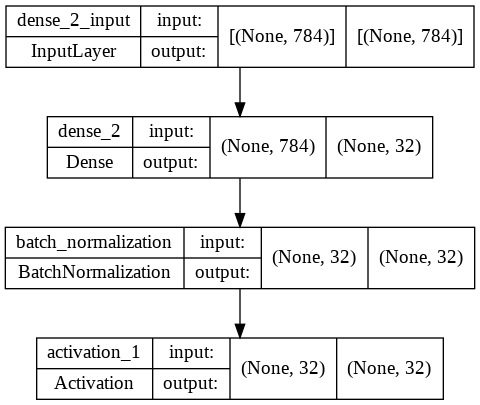

In [30]:
model = Sequential()

model.add(Dense(32, input_shape=(28*28,), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.summary()

plot_model(model, show_shapes=True)

### 규제화
- 복잡한 네트워크 일수록 네트워크의 복잡도에 제한을 두어  
  가중치가 작은 값을 가지도록 함

- 가중치의 분포가 더 균일하게 됨

- 네트워크 손실함수에 큰 가중치에 연관된 비용을 추가
  - L1 규제 : 가중치의 절댓값에 비례하는 비용이 추가
  - L2 규제 : 가중치의 제곱에 비례하는 비용이 추가(흔히 가중치 감쇠라고도 불림)
  - 위 2규제가 합쳐진 경우도 존재

데이터는 **모델의 크기** 파트에서 사용된 imdb dataset

In [31]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

#### 모델 구성

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                80016     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
_________________________________________________________________


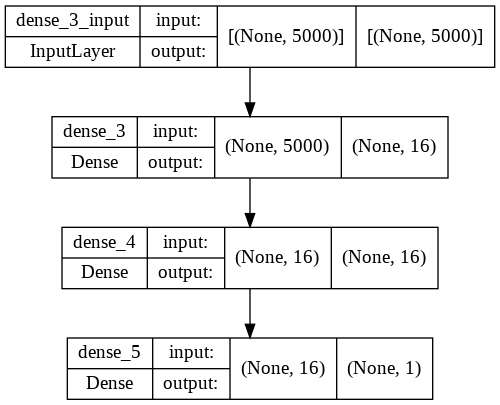

In [32]:
l2_model = Sequential([Dense(16, kernel_regularizer=l2(0.001), activation='relu', input_shape=(5000, )),
                       Dense(16, kernel_regularizer=l2(0.001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l2_model.summary()
plot_model(l2_model, show_shapes=True)

#### 모델 학습

In [33]:
l2_model_hist = l2_model.fit(x_train, y_train, 
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.5059 - acc: 0.8176 - val_loss: 0.3953 - val_acc: 0.8704
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3377 - acc: 0.8935 - val_loss: 0.3529 - val_acc: 0.8787
Epoch 3/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2946 - acc: 0.9086 - val_loss: 0.3323 - val_acc: 0.8858
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2772 - acc: 0.9136 - val_loss: 0.3404 - val_acc: 0.8822
Epoch 5/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2677 - acc: 0.9158 - val_loss: 0.3750 - val_acc: 0.8659
Epoch 6/20
49/49 [==============================] - 1s 15ms/step - loss: 0.2576 - acc: 0.9212 - val_loss: 0.3584 - val_acc: 0.8750
Epoch 7/20
49/49 [==============================] - 1s 19ms/step - loss: 0.2531 - acc: 0.9238 - val_loss: 0.3552 - val_acc: 0.8778
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2496 - a

#### 시각화
- Model 1은 **모델의 크기 축소**파트에서의 모델

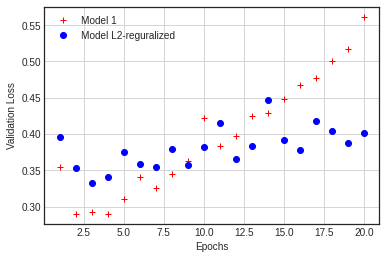

In [34]:
l2_model_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l2_model_val_loss, 'bo',label='Model L2-reguralized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### L1과 비교

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                80016     
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
_________________________________________________________________


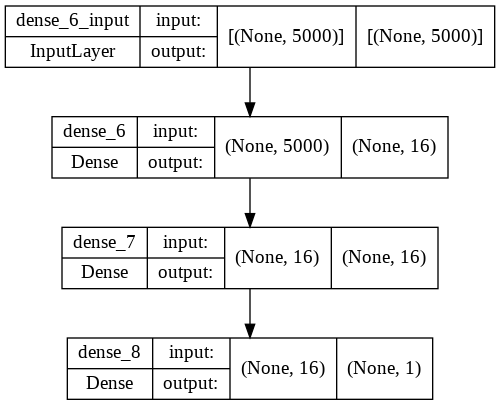

In [35]:
l1_model = Sequential([Dense(16, kernel_regularizer=l1(0.0001), activation='relu', input_shape=(5000, )),
                       Dense(16, kernel_regularizer=l1(0.0001), activation='relu'),
                       Dense(1, activation='sigmoid')])

l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_model.summary()
plot_model(l1_model, show_shapes=True)

In [36]:
l1_model_hist = l1_model.fit(x_train, y_train, 
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 30ms/step - loss: 0.5618 - acc: 0.8104 - val_loss: 0.4341 - val_acc: 0.8672
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3762 - acc: 0.8906 - val_loss: 0.3689 - val_acc: 0.8858
Epoch 3/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3358 - acc: 0.9008 - val_loss: 0.3537 - val_acc: 0.8881
Epoch 4/20
49/49 [==============================] - 1s 15ms/step - loss: 0.3125 - acc: 0.9082 - val_loss: 0.3516 - val_acc: 0.8864
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3044 - acc: 0.9108 - val_loss: 0.3538 - val_acc: 0.8854
Epoch 6/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2944 - acc: 0.9142 - val_loss: 0.3572 - val_acc: 0.8827
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2884 - acc: 0.9174 - val_loss: 0.3657 - val_acc: 0.8816
Epoch 8/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2851 - a

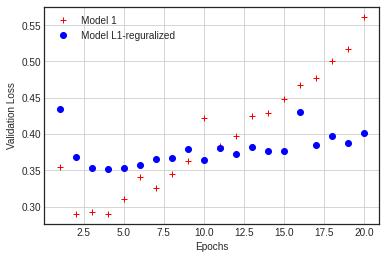

In [37]:
l1_model_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo',label='Model L1-reguralized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

3가지 모델 비교
- Original
- L1
- L2

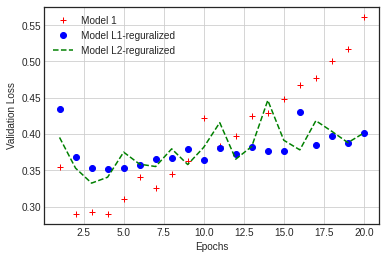

In [45]:
epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo',label='Model L1-reguralized')
plt.plot(epochs, l2_model_val_loss, 'g--',label='Model L2-reguralized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

#### L1, L2와 비교

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 16)                80016     
                                                                 
 dense_19 (Dense)            (None, 16)                272       
                                                                 
 dense_20 (Dense)            (None, 1)                 17        
                                                                 
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
_________________________________________________________________


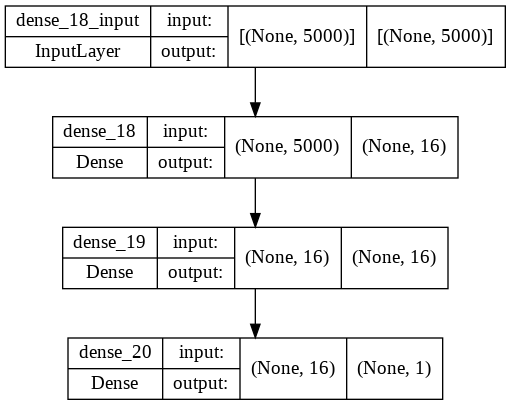

In [52]:
l1_l2_model = Sequential([Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), 
                                activation='relu', input_shape=(5000, )),
                         Dense(16, kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001), 
                               activation='relu'),
                         Dense(1, activation='sigmoid')])

l1_l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

l1_l2_model.summary()
plot_model(l1_l2_model, show_shapes=True)

In [53]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train, 
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 2s 29ms/step - loss: 0.6338 - acc: 0.7505 - val_loss: 0.5066 - val_acc: 0.8608
Epoch 2/20
49/49 [==============================] - 1s 16ms/step - loss: 0.4384 - acc: 0.8809 - val_loss: 0.4056 - val_acc: 0.8846
Epoch 3/20
49/49 [==============================] - 1s 17ms/step - loss: 0.3595 - acc: 0.9013 - val_loss: 0.3642 - val_acc: 0.8874
Epoch 4/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3255 - acc: 0.9072 - val_loss: 0.3799 - val_acc: 0.8735
Epoch 5/20
49/49 [==============================] - 1s 16ms/step - loss: 0.3102 - acc: 0.9097 - val_loss: 0.3537 - val_acc: 0.8854
Epoch 6/20
49/49 [==============================] - 1s 22ms/step - loss: 0.2984 - acc: 0.9156 - val_loss: 0.3611 - val_acc: 0.8800
Epoch 7/20
49/49 [==============================] - 1s 16ms/step - loss: 0.2925 - acc: 0.9154 - val_loss: 0.3526 - val_acc: 0.8840
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2861 - a

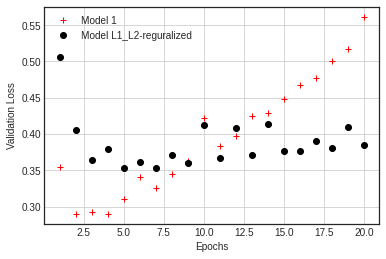

In [54]:
l1_l2_model_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_l2_model_val_loss, 'ko',label='Model L1_L2-reguralized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

4가지 모델 비교
- Original

- L1

- L2

- L1_L2

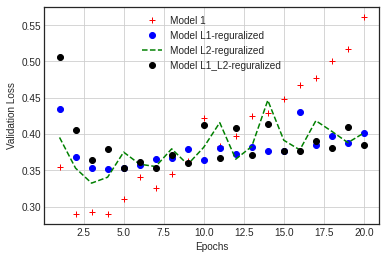

In [55]:
epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, l1_model_val_loss, 'bo',label='Model L1-reguralized')
plt.plot(epochs, l2_model_val_loss, 'g--',label='Model L2-reguralized')
plt.plot(epochs, l1_l2_model_val_loss, 'ko',label='Model L1_L2-reguralized')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()

### 드롭아웃(Dropout)
- 신경망을 위해 사용되는 규제 기법 중 가장 효과적이고 널리 사용되는 방법

- 신경망의 레이어에 드롭아웃을 적용하면 훈련하는 동안 무작위로 층의 일부 특성(노드)를 제외
  - 예를 들어, [1.0, 3.2, 0.6, 0.8, 1.1] 라는 벡터에 대해 드롭아웃을 적용하면 **무작위로 0으로 바뀜**  
    $\rightarrow$ [0, 3.2, 0.6, 0.8, 0]

  - 보통 0.2 ~ 0.5 사이의 비율로 지정됨

- 테스트 단계에서는 그 어떤 노드도 드롭아웃 되지 않는다.
  - 대신 해당 레이어의 출력 노드를 드롭아웃 비율에 맞게 줄여줌

In [60]:
from tensorflow.keras.layers import Dropout

#### 모델 구성

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                80016     
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_26 (Dense)            (None, 1)                 17        
                                                                 
Total params: 80,305
Trainable params: 80,305
Non-trainable params: 0
_________________________________________________________________


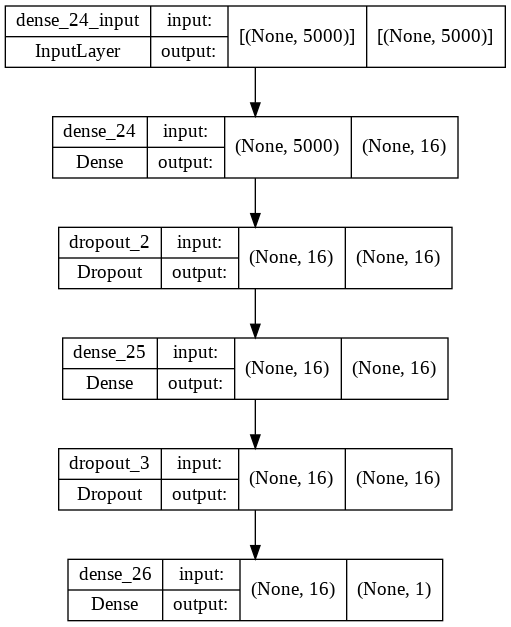

In [59]:
drouput_model = Sequential([Dense(16, activation='relu', input_shape=(5000,)),
                           Dropout(0.5),
                           Dense(16,activation='relu'),
                           Dropout(0.5),
                           Dense(1, activation='sigmoid')])

drouput_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

drouput_model.summary()
plot_model(drouput_model, show_shapes=True)

#### 모델 학습

In [61]:
drouput_model_hist = drouput_model.fit(x_train, y_train, 
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test,y_test))

Epoch 1/20
49/49 [==============================] - 3s 38ms/step - loss: 0.5924 - acc: 0.6748 - val_loss: 0.4365 - val_acc: 0.8577
Epoch 2/20
49/49 [==============================] - 1s 17ms/step - loss: 0.4458 - acc: 0.8046 - val_loss: 0.3411 - val_acc: 0.8745
Epoch 3/20
49/49 [==============================] - 1s 19ms/step - loss: 0.3685 - acc: 0.8538 - val_loss: 0.3017 - val_acc: 0.8823
Epoch 4/20
49/49 [==============================] - 1s 25ms/step - loss: 0.3223 - acc: 0.8787 - val_loss: 0.2815 - val_acc: 0.8863
Epoch 5/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2885 - acc: 0.8936 - val_loss: 0.2798 - val_acc: 0.8858
Epoch 6/20
49/49 [==============================] - 1s 23ms/step - loss: 0.2659 - acc: 0.9012 - val_loss: 0.2834 - val_acc: 0.8859
Epoch 7/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2446 - acc: 0.9109 - val_loss: 0.2959 - val_acc: 0.8817
Epoch 8/20
49/49 [==============================] - 1s 17ms/step - loss: 0.2274 - a

#### 시각화

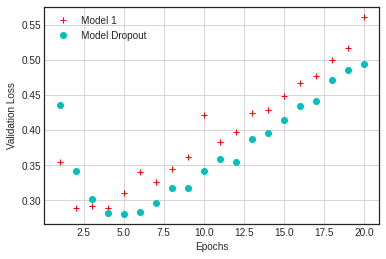

In [63]:
dropout_model_val_loss = drouput_model_hist.history['val_loss']

epochs = range(1, 21)
plt.plot(epochs, model_1_val_loss, 'r+', label='Model 1')
plt.plot(epochs, dropout_model_val_loss, 'co',label='Model Dropout')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()

plt.show()